In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import joblib
import numpy as np

In [2]:
data = pd.read_csv('employee_attrition_data.csv')
data.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [3]:
data.tail()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
995,995,39,Female,HR,HR Specialist,3,0.377435,239,0,71403,0
996,996,50,Male,Engineering,Manager,1,0.431152,154,0,30181,1
997,997,52,Male,Engineering,Analyst,3,0.647102,206,0,64143,0
998,998,37,Female,HR,HR Specialist,2,0.304813,241,0,74383,1
999,999,59,Male,Sales,HR Specialist,1,0.940510,159,0,73220,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [7]:
# finding null values
data.isna().sum()

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

In [9]:
# finding duplicated values
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [10]:
data.columns

Index(['Employee_ID', 'Age', 'Gender', 'Department', 'Job_Title',
       'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours',
       'Promotion_Last_5Years', 'Salary', 'Attrition'],
      dtype='object')

In [11]:
data.drop(columns='Employee_ID', inplace=True)

In [12]:
data.columns

Index(['Age', 'Gender', 'Department', 'Job_Title', 'Years_at_Company',
       'Satisfaction_Level', 'Average_Monthly_Hours', 'Promotion_Last_5Years',
       'Salary', 'Attrition'],
      dtype='object')

In [15]:
# We're going to determine the values for the Gender column
data['Gender'].value_counts()

Gender
Male      506
Female    494
Name: count, dtype: int64

In [26]:
data.groupby('Gender')['Salary'].mean()

Gender
Female    66087.939271
Male      63196.715415
Name: Salary, dtype: float64

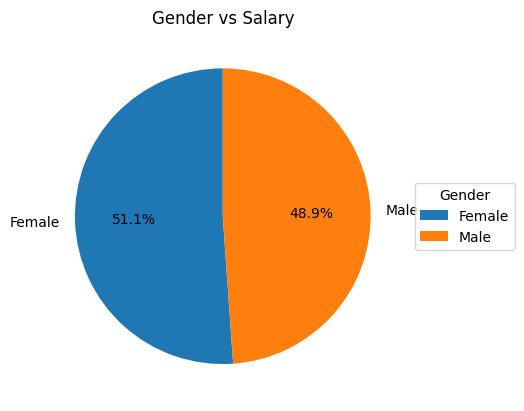

In [48]:
total_gen_vs_salary = data.groupby('Gender')['Salary'].mean()
fig, ax = plt.subplots()
# ploting pie
plt.pie(total_gen_vs_salary, labels=total_gen_vs_salary.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Gender vs Salary')

# adding legend
plt.legend(labels = total_gen_vs_salary.index, title='Gender', loc ='center left', bbox_to_anchor = (1,0,0.5,1))
plt.show()

In [49]:
data.groupby('Job_Title')['Salary'].mean().sort_values(ascending=False)

Job_Title
Analyst          66009.384615
Manager          65452.529126
Engineer         64440.163551
Accountant       64330.412621
HR Specialist    62724.407821
Name: Salary, dtype: float64

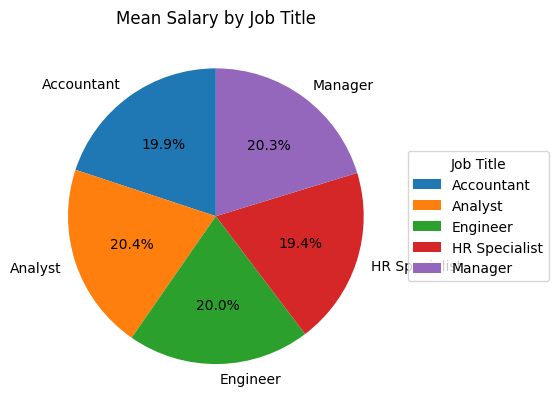

In [47]:
suma_total = data.groupby('Job_Title')['Salary'].mean()
fig, ax = plt.subplots()

# ploting pie
ax.pie(suma_total, labels=suma_total.index, autopct = '%1.1f%%', startangle=90)
plt.title('Average Salary by Job Title')

# adding legend
plt.legend(labels=suma_total.index, title = 'Job Title', loc = 'center left', bbox_to_anchor = (1,0,0.5,1))

plt.show()

In [52]:
data.groupby(['Department','Promotion_Last_5Years'])['Salary'].mean() #.sort_values(ascending=False)

Department   Promotion_Last_5Years
Engineering  0                        65541.063636
             1                        62424.127660
Finance      0                        63390.145299
             1                        62041.269663
HR           0                        63012.556701
             1                        65882.861702
Marketing    0                        65251.597826
             1                        66018.632653
Sales        0                        64295.846939
             1                        67838.756757
Name: Salary, dtype: float64

In [53]:
data.describe()

,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


In [54]:
data['Salary'].describe()

count     1000.000000
mean     64624.980000
std      20262.984333
min      30099.000000
25%      47613.500000
50%      64525.000000
75%      81921.000000
max      99991.000000
Name: Salary, dtype: float64

In [55]:
data['Satisfaction_Level'].describe()

count    1000.000000
mean        0.505995
std         0.289797
min         0.001376
25%         0.258866
50%         0.505675
75%         0.761135
max         0.999979
Name: Satisfaction_Level, dtype: float64

In [57]:
data.columns

Index(['Age', 'Gender', 'Department', 'Job_Title', 'Years_at_Company',
       'Satisfaction_Level', 'Average_Monthly_Hours', 'Promotion_Last_5Years',
       'Salary', 'Attrition'],
      dtype='object')

In [60]:
x = data[['Years_at_Company','Satisfaction_Level','Average_Monthly_Hours']]
y = data['Salary']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
x_train


,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours
950,5,0.420951,246
746,3,0.593106,154
946,7,0.343759,194
141,6,0.789898,238
78,4,0.712937,190
...,...,...,...
838,5,0.008964,248
524,2,0.839469,234
394,6,0.355372,158
730,9,0.866549,178


In [67]:
#let's scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train


array([[-0.2498348 , -0.29698019,  1.5602031 ],
       [-0.9674931 ,  0.30337   , -1.54165936],
       [ 0.46782351, -0.56616929, -0.19302351],
       ...,
       [ 0.10899436, -0.52567371, -1.40679577],
       [ 1.18548181,  1.25693673, -0.73247785],
       [ 0.46782351,  1.57208593, -0.46275068]])

In [69]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [70]:
x_test = scaler.fit_transform(x_test)
x_test

array([[-1.44984593e+00,  9.73576516e-01,  5.24497874e-01],
       [ 9.43767635e-01, -8.12022604e-01,  7.28384317e-01],
       [ 1.62765722e+00, -1.32756500e+00, -5.28915414e-01],
       [ 9.43767635e-01, -1.56298483e+00, -9.70669373e-01],
       [ 1.28571243e+00,  1.39009356e+00, -1.37844226e+00],
       [-1.44984593e+00,  3.16407026e-01, -1.44640441e+00],
       [-7.65956341e-01,  1.18561325e+00, -4.94934340e-01],
       [ 1.28571243e+00,  7.31746997e-01,  1.16724989e-01],
       [ 1.28571243e+00, -9.64828645e-01, -1.89104676e-01],
       [ 6.01822839e-01, -1.16891364e+00,  6.60422169e-01],
       [ 2.59878044e-01,  2.49184310e-01,  1.47596794e+00],
       [ 9.43767635e-01, -5.75370155e-01, -1.44640441e+00],
       [ 2.59878044e-01, -3.02244134e-01,  7.62365391e-01],
       [ 1.62765722e+00, -1.35214404e+00,  4.22554653e-01],
       [-4.24011546e-01,  1.25266512e+00, -2.57066823e-01],
       [ 2.59878044e-01,  6.09931375e-01, -1.00465045e+00],
       [-7.65956341e-01, -9.76140406e-01

In [72]:
x_test.shape

(200, 3)

In [74]:
def result_prediction(predictions):
    print('Mean Absolute Error = {}'.format(mean_absolute_error(y_test, predictions)))
    print('Mean Squared Error = {}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

In [76]:
lr = LinearRegression()
lr.fit(x_train, y_train)
predictionslr = lr.predict(x_test)
result_prediction(predictionslr)


Mean Absolute Error = 18295.47937411447
Mean Squared Error = 21009.520150919405


In [81]:
svrmodel = SVR()
param_gridsvr = {'C': [0.1, 0.1, 0.5], 'degree': [2, 3, 4], 'kernel': ['linear', 'rbf', 'poly']}
gridsvr = GridSearchCV(svrmodel,param_gridsvr)
gridsvr.fit(x_train, y_train.values.ravel())

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.1, 0.5], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [83]:
gridsvr.best_params_

{'C': 0.5, 'degree': 2, 'kernel': 'linear'}

In [85]:
predictionsvr = gridsvr.predict(x_test)
result_prediction(predictionsvr)

Mean Absolute Error = 18340.958835547626
Mean Squared Error = 21084.728854000277


In [97]:
rfrmodel = RandomForestRegressor()
param_gridrfr = {'n_estimators': [2, 3, 4, 5, 6], 'max_depth': [5, 10, 15]}
gridrfr = GridSearchCV(rfrmodel,param_gridrfr)
gridrfr.fit(x_train, y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6]})

In [98]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 6}

In [99]:
predictionsrfr = gridrfr.predict(x_test)
result_prediction(predictionsrfr)

Mean Absolute Error = 18537.89624696897
Mean Squared Error = 21340.687773062906


In [100]:
# exporting linear regressions model
joblib.dump(lr, 'model.pkl')

['model.pkl']